In [11]:
#Hello

In [12]:
#Import Libraries
import pandas as pd
import os

In [13]:
# Path to data folder relative to the notebook
DATA_DIR = os.path.join("..", "data", "raw")

In [14]:
ace_violations = pd.read_csv(os.path.join(DATA_DIR, "ACE_violations.csv"))

In [20]:
ace_violations.head()

,Violation ID,Vehicle ID,First Occurrence,Last Occurrence,Violation Status,Violation Type,Bus Route ID,Violation Latitude,Violation Longitude,Stop ID,Stop Name,Bus Stop Latitude,Bus Stop Longitude,Violation Georeference,Bus Stop Georeference
0,489740584,8cbe318769ba20029ec779cecda866b70a9f287224608c...,2025-08-20 22:27:20,2025-08-20 22:35:38,DRIVER/VEHICLE INFO MISSING,MOBILE DOUBLE PARKED,BX19,40.822820,-73.891765,103990,E 163 ST/SOUTHERN BLVD,40.821027,-73.891402,POINT (-73.891765 40.82282),POINT (-73.891402 40.821027)
1,489740421,8cc9b5062f26e2e88c8f8f370a8c91f159c7ec64f77104...,2025-08-20 21:37:30,2025-08-20 22:00:06,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,BX19,40.814338,-73.913096,101370,E 149 ST/TRINITY AV,40.813559,-73.910473,POINT (-73.913096 40.814338),POINT (-73.910473 40.813559)
2,489738197,d7ef9bd33bbd4738d9603027a74e128dbe708dfd3d5532...,2025-08-20 15:25:53,2025-08-20 19:14:06,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS STOP,BX19,40.813205,-73.909070,101314,E 149 ST/TRINITY AV,40.813420,-73.910157,POINT (-73.90907 40.813205),POINT (-73.910157 40.81342)
3,489737812,1748843257a0610319e4551b5094e6cd3824593eab130e...,2025-08-20 12:25:07,2025-08-20 12:30:25,EXEMPT - EMERGENCY VEHICLE,MOBILE BUS LANE,BX19,40.814812,-73.914604,103748,E 149 ST/BERGEN AV,40.815686,-73.916991,POINT (-73.914604 40.814812),POINT (-73.916991 40.815686)
4,489737459,b90522ce7ba9099540c345c40fd443dec9e895a4eb7b85...,2025-08-20 18:45:19,2025-08-20 18:51:35,DRIVER/VEHICLE INFO MISSING,MOBILE BUS STOP,BX19,40.812155,-73.904038,101316,E 149 ST/WALES AV,40.812779,-73.907136,POINT (-73.904038 40.812155),POINT (-73.907136 40.812779)


In [17]:
# Number of rows and columns
print(ace_violations.shape)

print(ace_violations.info())

# Summary statistics for numeric columns
print(ace_violations.describe())

# For object (string/categorical) columns
print(ace_violations.describe(include="object"))

# Count missing values per column
print(ace_violations.isna().sum())


(344147, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344147 entries, 0 to 344146
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Violation ID            344147 non-null  int64  
 1   Vehicle ID              344067 non-null  object 
 2   First Occurrence        344147 non-null  object 
 3   Last Occurrence         344147 non-null  object 
 4   Violation Status        344147 non-null  object 
 5   Violation Type          344147 non-null  object 
 6   Bus Route ID            344147 non-null  object 
 7   Violation Latitude      344147 non-null  float64
 8   Violation Longitude     344147 non-null  float64
 9   Stop ID                 344147 non-null  int64  
 10  Stop Name               344147 non-null  object 
 11  Bus Stop Latitude       344147 non-null  float64
 12  Bus Stop Longitude      344147 non-null  float64
 13  Violation Georeference  344147 non-null  object 
 14  Bus Sto

In [18]:
# Most common violation statuses
print(ace_violations["Violation Status"].value_counts())

# Most common violation types
print(ace_violations["Violation Type"].value_counts())

# Bus routes with most violations
print(ace_violations["Bus Route ID"].value_counts().head(10))


Violation Status
VIOLATION ISSUED                226757
EXEMPT - COMMERCIAL UNDER 20     33803
DRIVER/VEHICLE INFO MISSING      28303
TECHNICAL ISSUE/OTHER            22249
EXEMPT - EMERGENCY VEHICLE       19126
EXEMPT - BUS/PARATRANSIT          7093
EXEMPT - OTHER                    6816
Name: count, dtype: int64
Violation Type
MOBILE DOUBLE PARKED    211781
MOBILE BUS STOP          83836
MOBILE BUS LANE          48530
Name: count, dtype: int64
Bus Route ID
BX19    344147
Name: count, dtype: int64


In [19]:
ace_violations["First Occurrence"] = pd.to_datetime(ace_violations["First Occurrence"])
ace_violations["Last Occurrence"] = pd.to_datetime(ace_violations["Last Occurrence"])

# Check the time range
ace_violations["First Occurrence"].min(), ace_violations["Last Occurrence"].max()

# Make sure lat/lon values look reasonable
ace_violations[["Violation Latitude", "Violation Longitude"]].describe()


/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_53786/2785423671.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ace_violations["First Occurrence"] = pd.to_datetime(ace_violations["First Occurrence"])
/var/folders/r2/62xph3kj5rj_w51slp5lpvyc0000gn/T/ipykernel_53786/2785423671.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ace_violations["Last Occurrence"] = pd.to_datetime(ace_violations["Last Occurrence"])


,Violation Latitude,Violation Longitude
count,344147.000000,344147.000000
mean,40.823024,-73.909206
std,0.009641,0.021214
min,40.812095,-73.955510
25%,40.816122,-73.921577
50%,40.822084,-73.902641
75%,40.826057,-73.891853
max,40.860971,-73.880513


In [21]:
ace_violations["First Occurrence"] = pd.to_datetime(
    ace_violations["First Occurrence"], errors="coerce"
)
ace_violations["Quarter"] = ace_violations["First Occurrence"].dt.to_period("Q")

violations_per_quarter = (
    ace_violations.groupby("Quarter")["Violation ID"]
    .count()
    .reset_index(name="Total Violations")
)

print(violations_per_quarter)


   Quarter  Total Violations
0   2022Q4              1165
1   2023Q1              5718
2   2023Q2              1894
3   2023Q3              3192
4   2023Q4              6216
5   2024Q1              5314
6   2024Q2             13349
7   2024Q3             88025
8   2024Q4             74138
9   2025Q1             60744
10  2025Q2             62536
11  2025Q3             21856


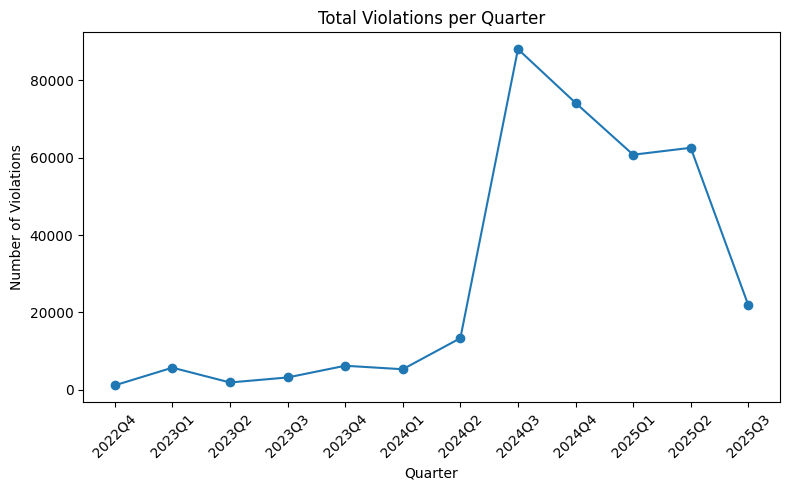

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(violations_per_quarter["Quarter"].astype(str),
         violations_per_quarter["Total Violations"], marker="o")
plt.title("Total Violations per Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Violations")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


  Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 37.9 MB/s eta 0:00:0031m41.8 MB/s eta 0:00:01
Using cached contourpy-1.3.3-cp313-cp313-macosx_11_0_arm64.whl (274 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.7 MB/s eta 0:00:00
Using cached pillow-11.3.0-cp313-cp313-macosx_11_0_arm64.whl (4.7 MB)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
# Get the absolute path to the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Construct the full path to the output file
output_path = os.path.join(project_root, "data", "processed", "bus_evasion_df.csv")

# Save the CSV
bus_evasion_df.to_csv(output_path, index=False)